<a href="https://colab.research.google.com/github/priyanshukr05/covid19-data-analysis/blob/main/covid_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Project: COVID-19 Data Analysis
# Author : Priyanshu Kumar

In [1]:
!pip install pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set(rc={"figure.figsize": (12,6)})


In [2]:
who_url = "https://srhdpeuwpubsa.blob.core.windows.net/whdh/COVID/WHO-COVID-19-global-daily-data.csv"
df = pd.read_csv(who_url)
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502800 entries, 0 to 502799
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_reported      502800 non-null  object 
 1   Country_code       500705 non-null  object 
 2   Country            502800 non-null  object 
 3   WHO_region         502800 non-null  object 
 4   New_cases          211220 non-null  float64
 5   Cumulative_cases   502800 non-null  int64  
 6   New_deaths         154273 non-null  float64
 7   Cumulative_deaths  502800 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 30.7+ MB


In [3]:
# Fix column names (strip/make lower, if needed)
df.columns = [c.strip() for c in df.columns]

# Ensure date parsing and sorting
df['Date_reported'] = pd.to_datetime(df['Date_reported'])
df = df.sort_values(['Country', 'Date_reported'])

# Fill missing values in numerical columns with 0 and ensure all are numeric
for col in ['New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)


In [4]:
countries = ["India", "United States of America", "Brazil", "Italy", "Russia"]
df_sel = df[df['Country'].isin(countries)].copy()


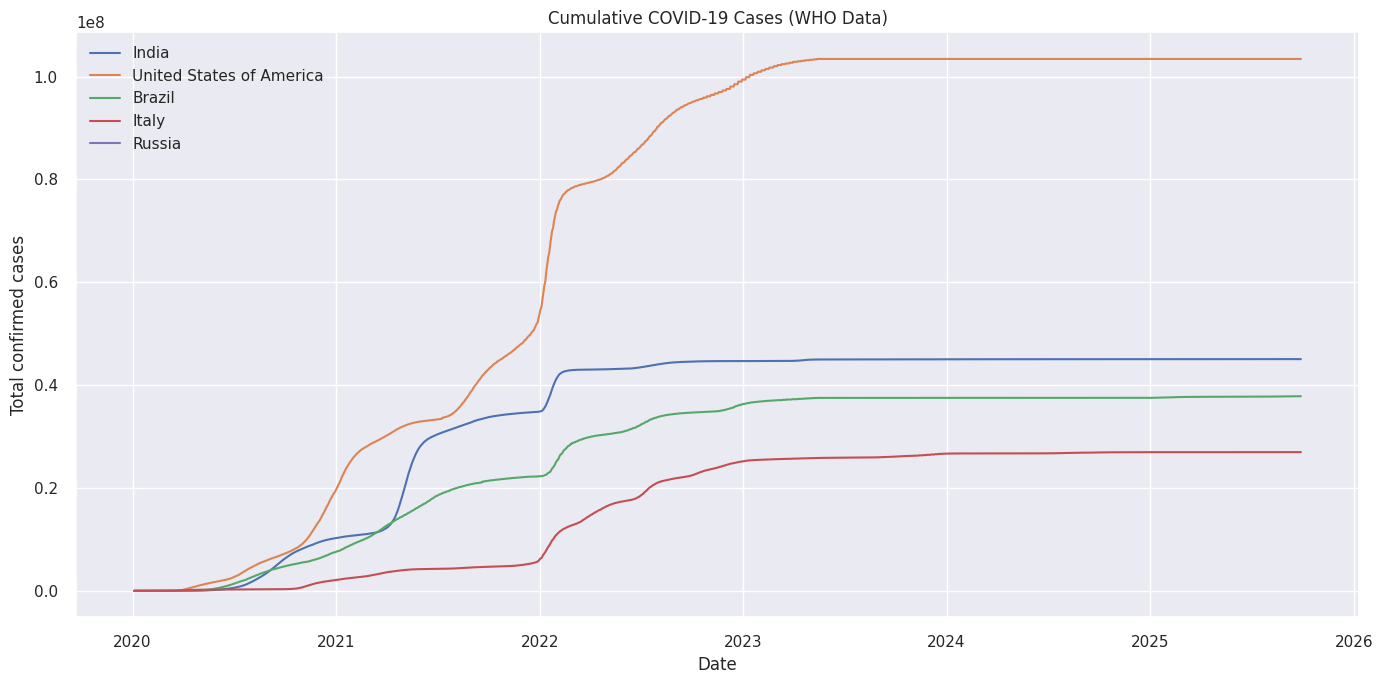

In [5]:
plt.figure(figsize=(14,7))
for c in countries:
    tmp = df_sel[df_sel['Country'] == c]
    plt.plot(tmp['Date_reported'], tmp['Cumulative_cases'], label=c)
plt.title("Cumulative COVID-19 Cases (WHO Data)")
plt.xlabel("Date")
plt.ylabel("Total confirmed cases")
plt.legend()
plt.tight_layout()
plt.show()


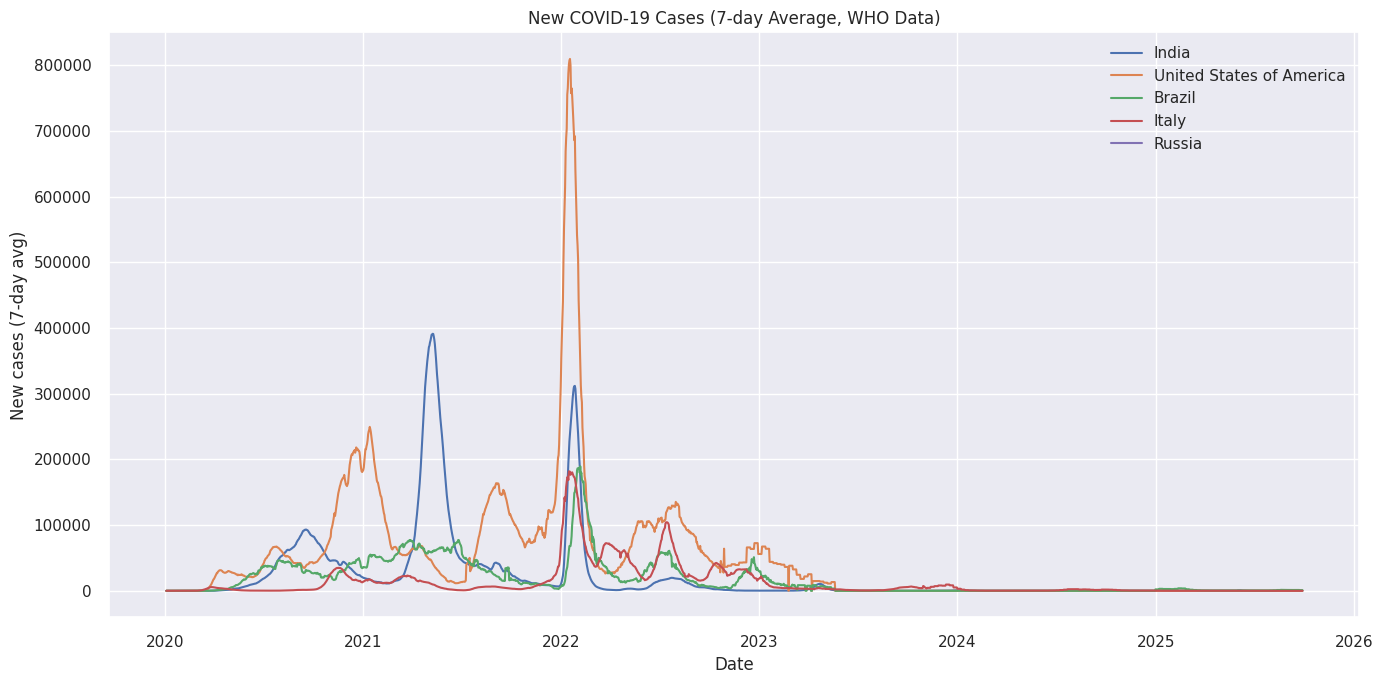

In [6]:
df_sel['New_cases_7d'] = df_sel.groupby('Country')['New_cases'].transform(
    lambda s: s.rolling(window=7, min_periods=1).mean()
)
plt.figure(figsize=(14,7))
for c in countries:
    tmp = df_sel[df_sel['Country'] == c]
    plt.plot(tmp['Date_reported'], tmp['New_cases_7d'], label=c)
plt.title("New COVID-19 Cases (7-day Average, WHO Data)")
plt.xlabel("Date")
plt.ylabel("New cases (7-day avg)")
plt.legend()
plt.tight_layout()
plt.show()


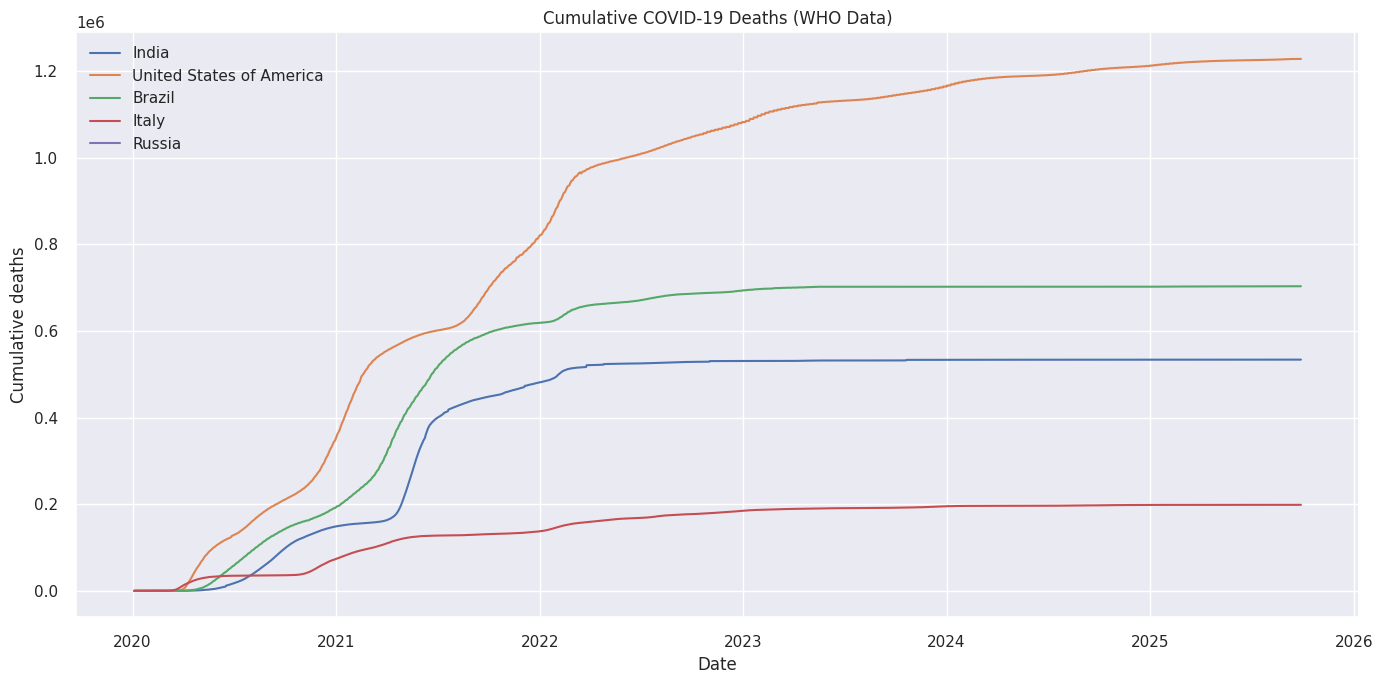

In [7]:
plt.figure(figsize=(14,7))
for c in countries:
    tmp = df_sel[df_sel['Country'] == c]
    plt.plot(tmp['Date_reported'], tmp['Cumulative_deaths'], label=c)
plt.title("Cumulative COVID-19 Deaths (WHO Data)")
plt.xlabel("Date")
plt.ylabel("Cumulative deaths")
plt.legend()
plt.tight_layout()
plt.show()


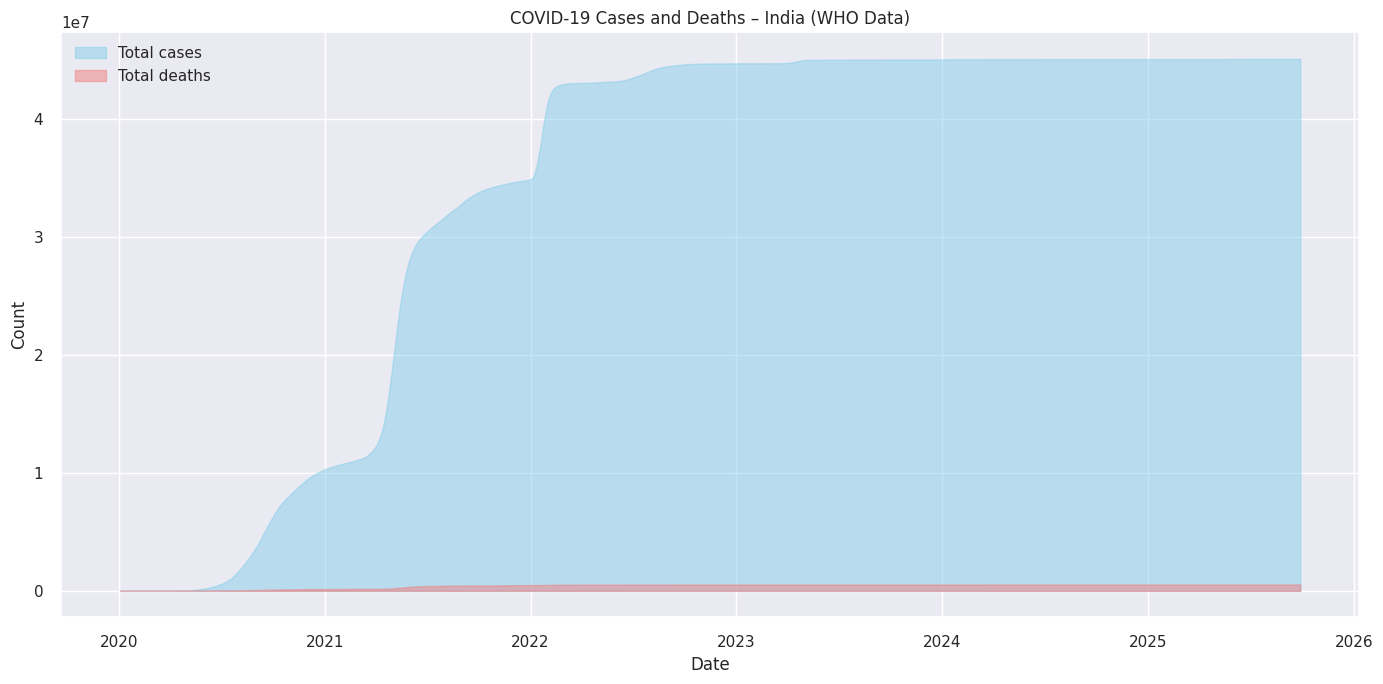

In [8]:
country = "India"
tmp = df[df['Country'] == country].copy()
plt.figure(figsize=(14,7))
plt.fill_between(tmp['Date_reported'], tmp['Cumulative_cases'], color="skyblue", alpha=0.5, label="Total cases")
plt.fill_between(tmp['Date_reported'], tmp['Cumulative_deaths'], color="lightcoral", alpha=0.5, label="Total deaths")
plt.title(f"COVID-19 Cases and Deaths – {country} (WHO Data)")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log10
  result = func(self.values, **kwargs)


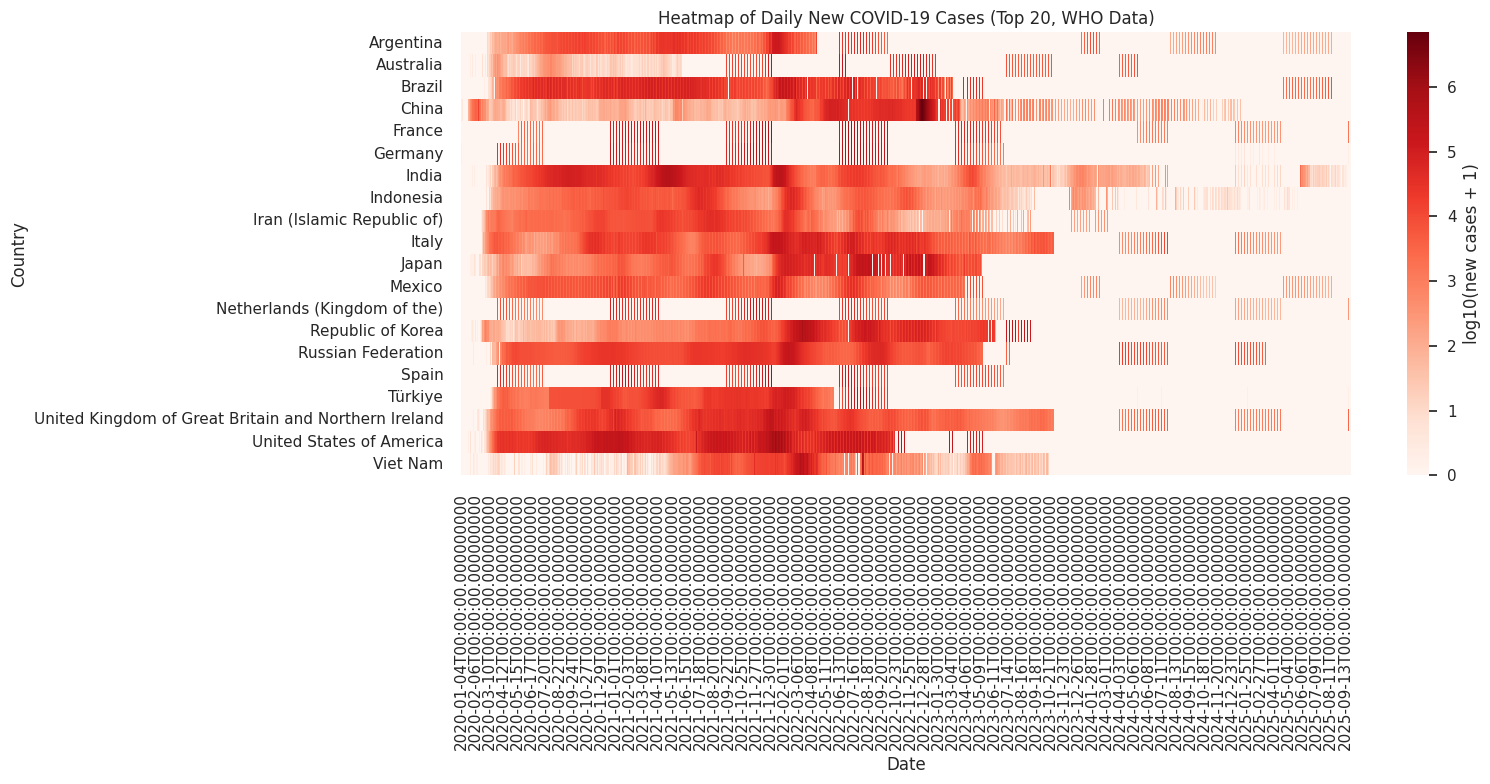

In [9]:
# Take the latest date and find top 20 by cumulative cases
latest_date = df['Date_reported'].max()
latest = df[df['Date_reported'] == latest_date]
top20 = latest.nlargest(20, "Cumulative_cases")["Country"].tolist()
df_top20 = df[df["Country"].isin(top20)].copy()

# Pivot: country × date for new cases
pivot = df_top20.pivot_table(
    index="Country",
    columns="Date_reported",
    values="New_cases",
    aggfunc="sum"
).fillna(0)

# Log transform to reduce outlier effect
pivot_log = np.log10(pivot + 1)

plt.figure(figsize=(16,8))
sns.heatmap(
    pivot_log,
    cmap="Reds",
    cbar_kws={"label": "log10(new cases + 1)"}
)
plt.title("Heatmap of Daily New COVID-19 Cases (Top 20, WHO Data)")
plt.xlabel("Date")
plt.ylabel("Country")
plt.tight_layout()
plt.show()
